### ==============================================================================
### WORKERS COMPENSATION FUND OF TANZANIA - AI TRAINING
### MODULE 2: END-TO-END MACHINE LEARNING PROJECT
### PROJECT: FORECASTING ANNUAL DISABLING CLAIM VOLUME
### ==============================================================================

We will use historical data from 1968-2023 to build a model that predicts the **Accepted disabling claims** for the next year (e.g., 2024).
- Accurately forecasting claim volume is crucial for annual budgeting, resource planning, and staffing at the WCF.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some default styles for our plots for better readability
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


#### Step 1: Look at the Big Picture
Before writing a single line of ML code, we must understand the objective.
- Business Objective: To provide an accurate, data-driven forecast of the annual number of accepted disabling claims to help WCF leadership with budgeting and resource allocation.
- Machine Learning Frame:
  - Type: Supervised Learning. We have historical data with the "correct answers" (the actual number of claims each year).
  - Task: Regression (specifically, Time Series Forecasting). We are predicting a number.
  - Learning: Batch Learning. We will train the model on all available historical data at once.
- Performance Measure: We need a way to measure how "good" our model is. For regression, a standard metric is the Root Mean Square Error (RMSE). This will tell us, on average, how many claims our forecast is off by. A lower RMSE is better.

In [3]:
# Load the dataset from the CSV file
file_path = './datasets/aggregate_annual_claims.csv'
claims = pd.read_csv(file_path)

# Display the first 5 rows to see what the data looks like
print("First 5 rows of the dataset:")
display(claims.head())

# Display the last 5 rows to see the time range
print("\nLast 5 rows of the dataset:")
display(claims.tail())

First 5 rows of the dataset:


,Year,Subject employers,Subject employees,Accepted disabling claims,Est. accepted nondisabling claims,Est. total accepted claims,Denied claims,Disabling claim denial rate,Fatality claims,Net PTD claims,Rate: accepted disabling claims per 100 employees,"Rate: fatality claims per 100,000 employees",Aggravation claims: Accepted disabling,Aggravation claims: Denied disabling,Disabling claims: median days to insurer acceptance,Disabling claims: median days to insurer denial,Disabling claims: Percent accepted or denied timely,Disabling claims: Percent with first payment timely
0,1968,49021,671900,32509,78800,111300,NaN,NaN,118,NaN,4.8,17.6,NaN,NaN,NaN,NaN,NaN,NaN
1,1969,52191,700800,35372,82300,117700,NaN,NaN,131,96.0,5.0,18.7,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,52789,704300,30338,80400,110700,1935.0,NaN,137,159.0,4.3,19.5,NaN,NaN,NaN,NaN,NaN,NaN
3,1971,58768,732500,30663,82200,112900,1709.0,NaN,132,217.0,4.2,18.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1972,62584,778800,34835,86900,121700,2177.0,NaN,133,286.0,4.5,17.1,NaN,NaN,NaN,NaN,NaN,NaN



Last 5 rows of the dataset:


,Year,Subject employers,Subject employees,Accepted disabling claims,Est. accepted nondisabling claims,Est. total accepted claims,Denied claims,Disabling claim denial rate,Fatality claims,Net PTD claims,Rate: accepted disabling claims per 100 employees,"Rate: fatality claims per 100,000 employees",Aggravation claims: Accepted disabling,Aggravation claims: Denied disabling,Disabling claims: median days to insurer acceptance,Disabling claims: median days to insurer denial,Disabling claims: Percent accepted or denied timely,Disabling claims: Percent with first payment timely
51,2019,126100,1972500,22399,46000,68400,10458.0,0.1,41,7.0,1.1,2.1,228.0,373.0,45.0,54.0,1.0,0.9
52,2020,128000,1857800,21858,40000,61900,8495.0,0.1,34,8.0,1.2,1.8,160.0,253.0,42.0,52.0,1.0,0.9
53,2021,134200,1909400,24385,40200,64600,8161.0,0.1,44,5.0,1.3,2.3,143.0,246.0,44.0,55.0,1.0,0.9
54,2022,137900,1987300,24948,42300,67200,8818.0,0.1,30,9.0,1.3,1.5,134.0,188.0,45.0,53.0,0.9,0.9
55,2023,136700,2024000,22994,38700,61700,8253.0,0.1,42,10.0,1.1,2.1,128.0,176.0,44.0,55.0,0.9,0.9


#### Step 3: Explore and Visualize the Data to Gain Insights
This step, known as Exploratory Data Analysis (EDA), is where we become detectives. We look for patterns, anomalies, and insights that will guide our modeling strategy.


In [4]:
# Get a quick summary of the data, including data types and missing values
print("Data Info:")
claims.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 18 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Year                                                 56 non-null     int64  
 1   Subject employers                                    56 non-null     int64  
 2   Subject employees                                    56 non-null     int64  
 3   Accepted disabling claims                            56 non-null     int64  
 4   Est. accepted nondisabling claims                    56 non-null     int64  
 5   Est. total accepted claims                           56 non-null     int64  
 6   Denied claims                                        54 non-null     float64
 7   Disabling claim denial rate                          32 non-null     float64
 8   Fatality claims                                      56 non-n

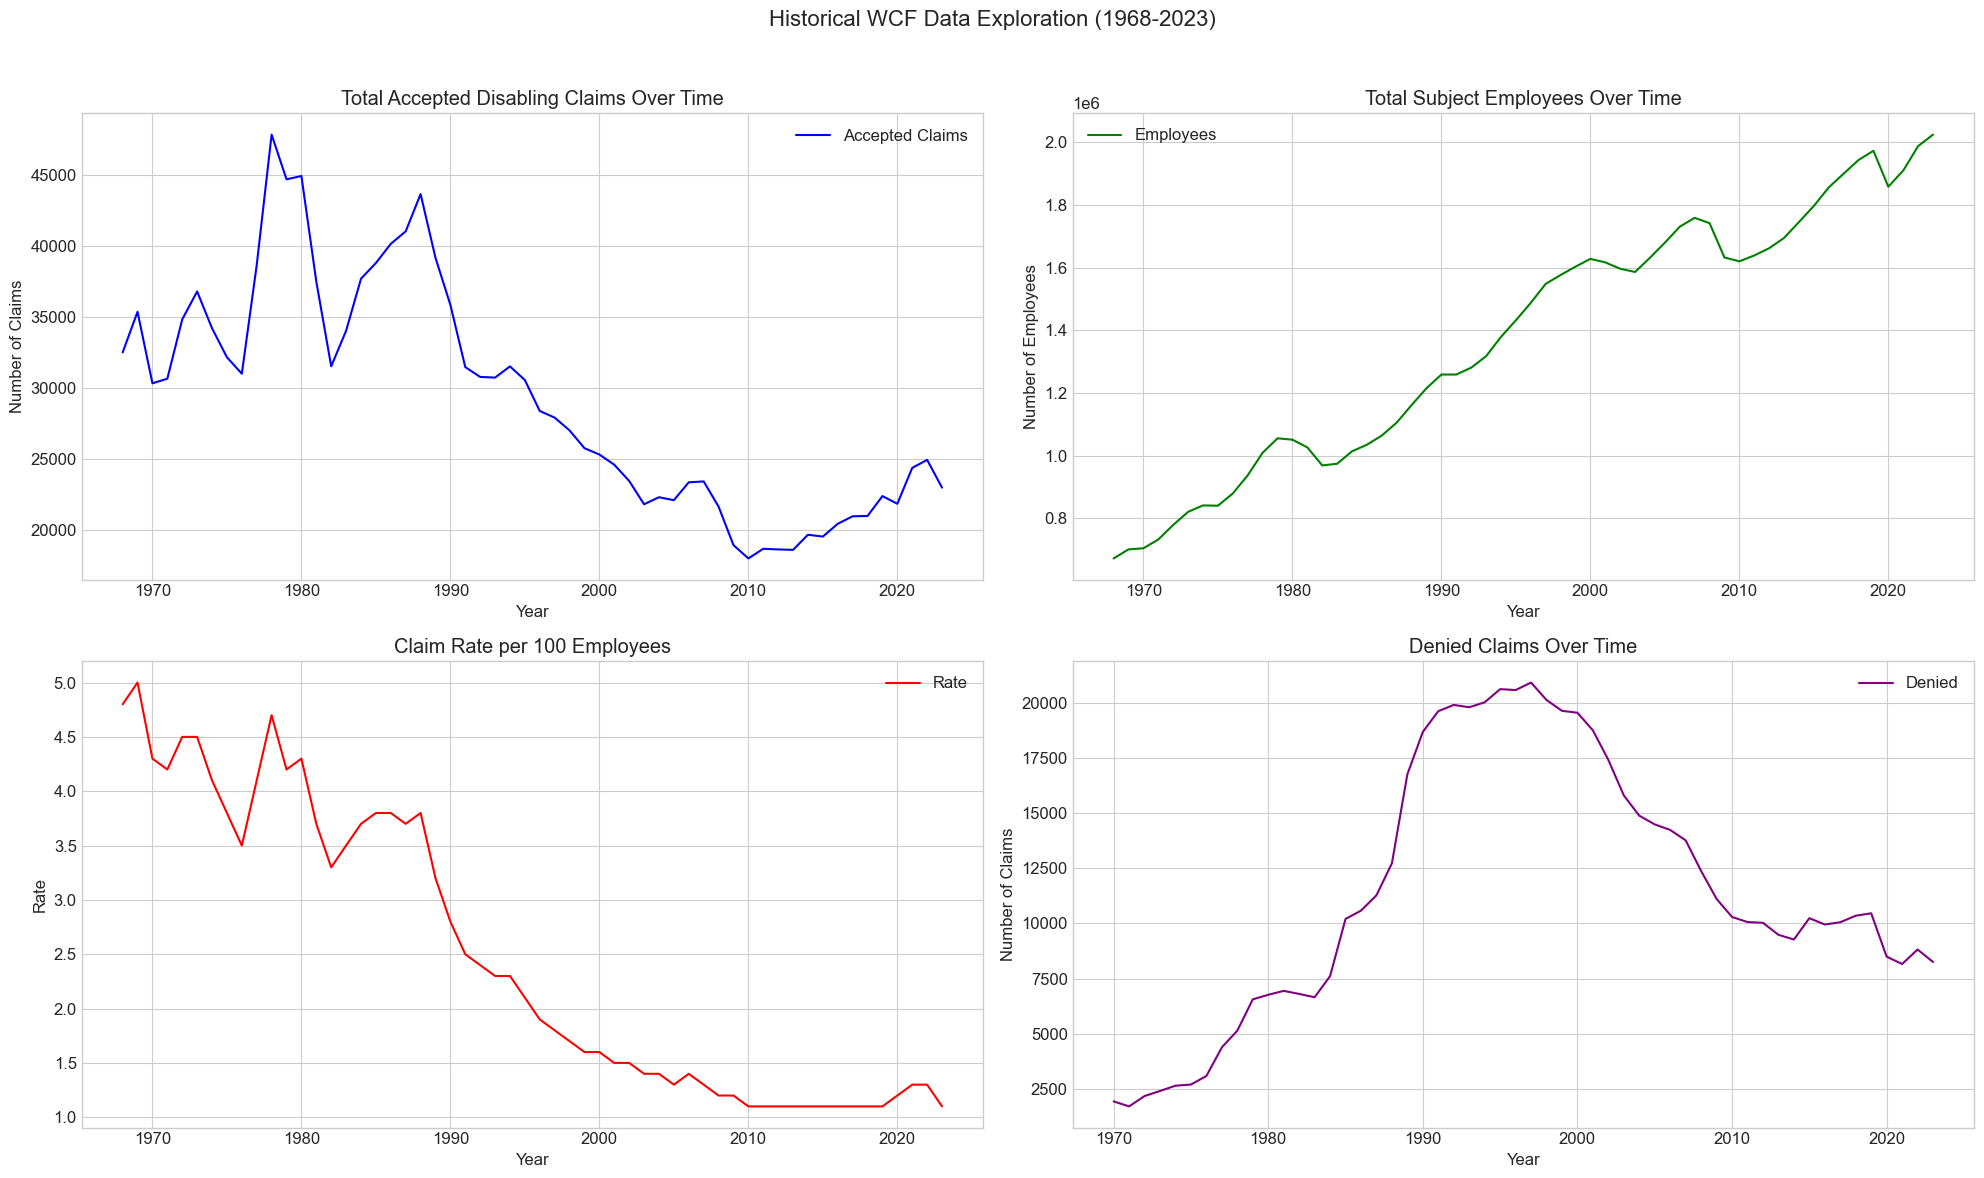

In [5]:
# Let's visualize the core metrics over time.
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Historical WCF Data Exploration (1968-2023)', fontsize=16)

# Plot 1: Accepted Disabling Claims
axes[0, 0].plot(claims['Year'], claims['Accepted disabling claims'], label='Accepted Claims', color='blue')
axes[0, 0].set_title('Total Accepted Disabling Claims Over Time')
axes[0, 0].set_ylabel('Number of Claims')

# Plot 2: Subject Employees
axes[0, 1].plot(claims['Year'], claims['Subject employees'], label='Employees', color='green')
axes[0, 1].set_title('Total Subject Employees Over Time')
axes[0, 1].set_ylabel('Number of Employees')

# Plot 3: Rate of claims per 100 employees
axes[1, 0].plot(claims['Year'], claims['Rate: accepted disabling claims per 100 employees'], label='Rate', color='red')
axes[1, 0].set_title('Claim Rate per 100 Employees')
axes[1, 0].set_ylabel('Rate')

# Plot 4: Denied Claims
axes[1, 1].plot(claims['Year'], claims['Denied claims'], label='Denied', color='purple')
axes[1, 1].set_title('Denied Claims Over Time')
axes[1, 1].set_ylabel('Number of Claims')

for ax in axes.flat:
    ax.set_xlabel('Year')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Step 4: Prepare the Data for Machine Learning
This is often the most time-consuming part of a project. We need to clean the data and engineer features that our model can learn from.
##### 4.1. The Train-Test Split (Time Series Critical Rule)
For time series data, we cannot shuffle the data randomly. We must split it chronologically to simulate a real-world scenario where we use the past to predict the future. We will train our model on data up to a certain point and test it on the years that follow.

In [6]:
# Let's decide on a split year. We'll train on data up to 2018 and test on 2019-2023.
split_year = 2018

# For simplicity and due to missing data, let's filter the dataset to start from 1992
# where the data is more complete.
df_filtered = claims[claims['Year'] >= 1992].copy()

train_df = df_filtered[df_filtered['Year'] <= split_year]
test_df = df_filtered[df_filtered['Year'] > split_year]

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Training data shape: (27, 18)
Test data shape: (5, 18)


##### 4.2. Feature Engineering: Creating Lag Features
To use standard regression models for a time series problem, we transform it by creating "lag" features. This means we will use the data from the previous year to predict the data for the current year.

In [7]:
# Let's select the features we believe will be most predictive
features_to_lag = [
    'Subject employees',
    'Denied claims',
    'Fatality claims',
    'Rate: accepted disabling claims per 100 employees'
    # Removed 'Accepted disabling claims' to avoid duplicate columns
 ]

# The target variable we want to predict
target_col = 'Accepted disabling claims'

# Create a new dataframe for our model
model_df = df_filtered[['Year', target_col] + features_to_lag].copy()

# Create lag features (data from the previous year)
for col in features_to_lag:
    model_df[f'{col}_lag1'] = model_df[col].shift(1)

# Drop rows with NaN values created by the shift operation
model_df.dropna(inplace=True)

print("Dataframe with Lag Features:")
display(model_df.head())

Dataframe with Lag Features:


,Year,Accepted disabling claims,Subject employees,Denied claims,Fatality claims,Rate: accepted disabling claims per 100 employees,Subject employees_lag1,Denied claims_lag1,Fatality claims_lag1,Rate: accepted disabling claims per 100 employees_lag1
25,1993,30741,1317100,19796.0,64,2.3,1280500.0,19902.0,63.0,2.4
26,1994,31530,1378800,20021.0,55,2.3,1317100.0,19796.0,64.0,2.3
27,1995,30564,1431600,20617.0,48,2.1,1378800.0,20021.0,55.0,2.3
28,1996,28389,1487300,20576.0,54,1.9,1431600.0,20617.0,48.0,2.1
29,1997,27922,1547800,20915.0,43,1.8,1487300.0,20576.0,54.0,1.9


To predict Accepted disabling claims for 1993, our model will use the feature values from 1992 (e.g., Accepted disabling claims_lag1, Subject employees_lag1, etc.).

##### 4.3. Finalizing Features (X) and Labels (y)
Now we separate our data into the features (X) our model will learn from, and the target (y) it will try to predict.

In [8]:
# Our features are the lagged columns
feature_cols = [col for col in model_df.columns if '_lag1' in col]
X = model_df[feature_cols]

# Our target is the current year's claims
y = model_df[target_col]

# Split the prepared data into train and test sets
X_train = X[model_df['Year'] <= split_year]
X_test = X[model_df['Year'] > split_year]
y_train = y[model_df['Year'] <= split_year]
y_test = y[model_df['Year'] > split_year]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (26, 4)
Shape of y_train: (26,)
Shape of X_test: (5, 4)
Shape of y_test: (5,)


##### 4.4. Feature Scaling
Our features have very different scales (e.g., employees in millions, rates close to 1). We need to standardize them so our model treats them equally.

In [9]:
from sklearn.preprocessing import StandardScaler

# IMPORTANT: We fit the scaler ONLY on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# We use the SAME fitted scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

print("First 2 rows of scaled training data:\n", X_train_scaled[:2])

First 2 rows of scaled training data:
 [[-2.30528901  1.09974502  1.94361316  2.23455674]
 [-2.0570837   1.07532573  2.02955523  1.9894155 ]]


##### Step 5: Select and Train a Model
We'll start with a simple model to create a baseline, then try a more complex one.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# --- Model 1: Linear Regression (Baseline) ---
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Evaluate on the training set
lr_train_preds = lr_model.predict(X_train_scaled)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_preds))
print(f"Linear Regression Training RMSE: {lr_train_rmse:.2f} claims")

# --- Model 2: Random Forest (More Powerful) ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate on the training set
rf_train_preds = rf_model.predict(X_train_scaled)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_preds))
print(f"Random Forest Training RMSE: {rf_train_rmse:.2f} claims")

Linear Regression Training RMSE: 756.78 claims
Random Forest Training RMSE: 338.22 claims


#### Step 6: Fine-Tune Your Model
We need a more robust way to evaluate our model than just the training score. For time series, we use TimeSeriesSplit for cross-validation.

In [11]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# TimeSeriesSplit ensures we always train on past data to validate on future data
tscv = TimeSeriesSplit(n_splits=5)

# We will use GridSearchCV to find the best hyperparameters for our Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [1, 2, 3]
}

# NOTE: We use the unscaled training data here, as we will build a pipeline next.
# For now, let's just tune the Random Forest itself.
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=tscv,
                           scoring='neg_root_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters found:", grid_search.best_params_)
print("Best Cross-Validation RMSE: {:.2f} claims".format(-grid_search.best_score_))

# Let's store our best, fine-tuned model
final_model = grid_search.best_estimator_

Best Hyperparameters found: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50}
Best Cross-Validation RMSE: 2257.78 claims


#### Step 7: Present Your Solution (Evaluate on the Test Set)
Now is the moment of truth. We will use our fine-tuned model, which has never seen data past 2018, to make forecasts for 2019-2023 and see how it performs against the real data.

In [12]:
# Make predictions on the held-out test set
final_predictions = final_model.predict(X_test_scaled)

# Calculate the final RMSE on the test set
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print(f"Final Model Test RMSE: {final_rmse:.2f} claims")

# Create a DataFrame to easily plot the results
results_df = pd.DataFrame({
    'Year': test_df['Year'],
    'Actual_Claims': y_test,
    'Predicted_Claims': final_predictions
})

Final Model Test RMSE: 2450.46 claims


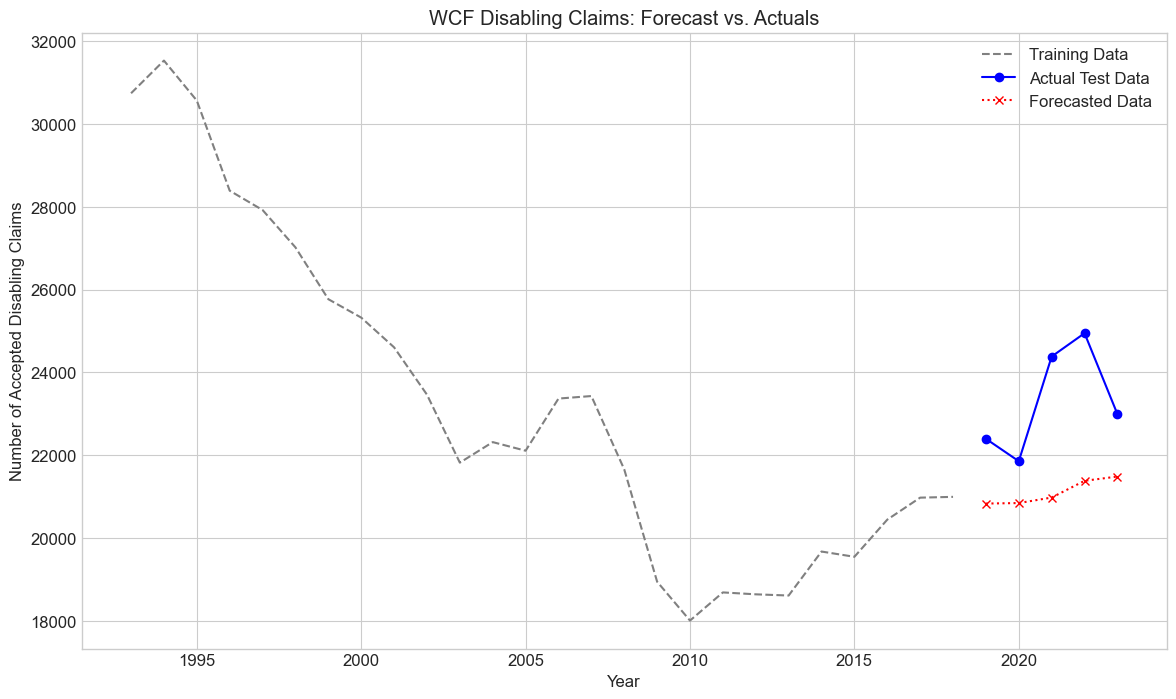

,Year,Actual_Claims,Predicted_Claims
51,2019,22399,20835.570833
52,2020,21858,20847.497500
53,2021,24385,20980.420000
54,2022,24948,21384.751667
55,2023,22994,21487.220000


In [13]:
plt.figure(figsize=(14, 8))
plt.plot(model_df[model_df['Year'] <= split_year]['Year'], y_train, label='Training Data', color='gray', linestyle='--')
plt.plot(results_df['Year'], results_df['Actual_Claims'], label='Actual Test Data', color='blue', marker='o')
plt.plot(results_df['Year'], results_df['Predicted_Claims'], label='Forecasted Data', color='red', marker='x', linestyle=':')

plt.title('WCF Disabling Claims: Forecast vs. Actuals')
plt.xlabel('Year')
plt.ylabel('Number of Accepted Disabling Claims')
plt.legend()
plt.grid(True)
plt.show()

display(results_df)

#### Step 8: Launch, Monitor, and Maintain
The project isn't over once the model is built.
##### 8.1. Launch (Saving the Model)
We need to save our final model so we can use it in a production environment without having to retrain it every time. We'll also save the scaler, as we need it to process new data.

In [20]:
import joblib

# Save the final model and the scaler
joblib.dump(final_model, 'aggregate_claims_forecaster.pkl')
joblib.dump(scaler, 'aggregate_data_scaler.pkl')

print("Model and scaler saved successfully.")

# Example of loading and using the model for a new year's prediction
# loaded_model = joblib.load('aggregate_claims_forecaster.pkl')
# loaded_scaler = joblib.load('aggregate_data_scaler.pkl')
# new_data = ... (this would be the data from the most recent year)
# new_data_scaled = loaded_scaler.transform(new_data)
# forecast = loaded_model.predict(new_data_scaled)
# print(f"Forecast for next year: {forecast[0]:.0f} claims")

Model and scaler saved successfully.


#### 8.2. Monitor and Maintain
- Monitoring: The model's performance should be tracked. At the end of each year, when the actual claim numbers are finalized, we should compare them to our forecast to see if the model's accuracy is degrading (a phenomenon called "model drift").
- Maintenance: We need an automated process.
  1. Collect Data: At the end of each year, add the new, complete data to our historical dataset.
  2. Retrain: Run this entire notebook as a script to automatically retrain the model on the newly updated data.
  3. Deploy: The newly trained model replaces the old one, ready to make a forecast for the next year.


In [16]:
# In a new cell at the end of the notebook

import joblib
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the previously defined dataframes if the notebook was restarted
# (Assuming train_df, test_df, y_train, y_test etc. are in memory from previous cells)
# We will redefine model_df to ensure a clean slate for this new section.
file_path = './datasets/aggregate_annual_claims.csv'
claims = pd.read_csv(file_path)
df_filtered = claims[claims['Year'] >= 1992].copy()

#### ==============================================================================
#### Step 9: Iterating to Improve Accuracy
#### ==============================================================================
Our first model gave us a baseline RMSE of **2450.46 claims**. Now, let's apply some of the improvement strategies we discussed to see if we can build a more accurate model.

We will focus on two key areas:
1.  **Richer Feature Engineering:** Adding more lags, rolling averages, and trend features.
2.  **Trying a More Powerful Model:** Using XGBoost, an industry-standard gradient boosting library.

In [17]:
# In a new cell

# --- 9.1 Richer Feature Engineering ---

# Define our core variables again for clarity
features_to_lag = [
    'Subject employees',
    'Denied claims',
    'Fatality claims',
    'Rate: accepted disabling claims per 100 employees',
    'Accepted disabling claims' # We'll lag this as well as a feature
]
target_col = 'Accepted disabling claims'

# Start with a clean, filtered dataframe
adv_model_df = df_filtered[['Year'] + features_to_lag].copy()

# 1. Add More Lags (up to 3 years)
for col in features_to_lag:
    for i in range(1, 4): # Lags 1, 2, and 3
        adv_model_df[f'{col}_lag{i}'] = adv_model_df[col].shift(i)

# 2. Add Rolling Averages (3-year window)
for col in features_to_lag:
    # The rolling window includes the previous 3 years, so we shift by 1
    adv_model_df[f'{col}_3yr_roll_avg'] = adv_model_df[col].rolling(window=3).mean().shift(1)

# 3. Add Trend/Difference Features (Year-over-Year change)
for col in features_to_lag:
    # The difference between last year and the year before
    adv_model_df[f'{col}_yoy_change'] = adv_model_df[col].diff().shift(1)

# Drop rows with NaN values (the first few years will be incomplete)
adv_model_df.dropna(inplace=True)

print("Advanced Feature Engineering Complete. Example features for the first available year:")
display(adv_model_df.head(1).T)

Advanced Feature Engineering Complete. Example features for the first available year:


,27
Year,1.995000e+03
Subject employees,1.431600e+06
Denied claims,2.061700e+04
Fatality claims,4.800000e+01
Rate: accepted disabling claims per 100 employees,2.100000e+00
Accepted disabling claims,3.056400e+04
Subject employees_lag1,1.378800e+06
Subject employees_lag2,1.317100e+06
Subject employees_lag3,1.280500e+06
Denied claims_lag1,2.002100e+04


Now we have a much richer set of features for our model to learn from. Let's prepare our new training and test sets.

In [18]:
# In a new cell

# --- 9.2 Prepare Advanced Train/Test Sets ---

split_year = 2018

# Define the new feature columns (all columns except Year and the original target)
adv_feature_cols = [col for col in adv_model_df.columns if col not in ['Year', target_col]]
adv_target_col = target_col

X_adv = adv_model_df[adv_feature_cols]
y_adv = adv_model_df[adv_target_col]

# Split the data chronologically
X_train_adv = X_adv[adv_model_df['Year'] <= split_year]
X_test_adv = X_adv[adv_model_df['Year'] > split_year]
y_train_adv = y_adv[adv_model_df['Year'] <= split_year]
y_test_adv = y_adv[adv_model_df['Year'] > split_year]

# --- Feature Scaling ---
# IMPORTANT: We still fit the scaler ONLY on the new advanced training data
adv_scaler = StandardScaler()
X_train_adv_scaled = adv_scaler.fit_transform(X_train_adv)
X_test_adv_scaled = adv_scaler.transform(X_test_adv)

print("Advanced Train/Test Split and Scaling Complete.")
print("Shape of X_train_adv_scaled:", X_train_adv_scaled.shape)
print("Shape of X_test_adv_scaled:", X_test_adv_scaled.shape)

Advanced Train/Test Split and Scaling Complete.
Shape of X_train_adv_scaled: (24, 29)
Shape of X_test_adv_scaled: (5, 29)


##### 9.3. Train and Tune a More Powerful Model (XGBoost)
XGBoost is a highly optimized gradient boosting library. It's often a top choice for structured/tabular data problems like this. We'll use `GridSearchCV` again to find its best hyperparameters.

In [19]:
# In a new cell

# Install xgboost if it's not already in the environment
# !pip install xgboost

# --- Model 3: XGBoost with Hyperparameter Tuning ---
tscv = TimeSeriesSplit(n_splits=5)

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# NOTE: This grid is larger and may take a few minutes to run.
# For a faster result during the workshop, you can use a smaller grid.
# For example: {'n_estimators': [100], 'max_depth': [3, 5], 'learning_rate': [0.1]}
xgb_grid_search = GridSearchCV(
    xgb.XGBRegressor(random_state=42),
    param_grid=xgb_param_grid,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

xgb_grid_search.fit(X_train_adv_scaled, y_train_adv)

print("Best XGBoost Hyperparameters found:", xgb_grid_search.best_params_)
print("Best XGBoost Cross-Validation RMSE: {:.2f} claims".format(-xgb_grid_search.best_score_))

# Store our new, improved final model
final_model_v2 = xgb_grid_search.best_estimator_

Best XGBoost Hyperparameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best XGBoost Cross-Validation RMSE: 1811.33 claims


##### 9.4. Final Evaluation and Comparison
Let's see if our new features and more powerful model resulted in a better forecast on the unseen test data (2019-2023).

Original Model (Random Forest) Test RMSE: 2450.46 claims
IMPROVED Model (XGBoost) Test RMSE: 2596.11 claims
Improvement: -145.65 claims (-5.94%)


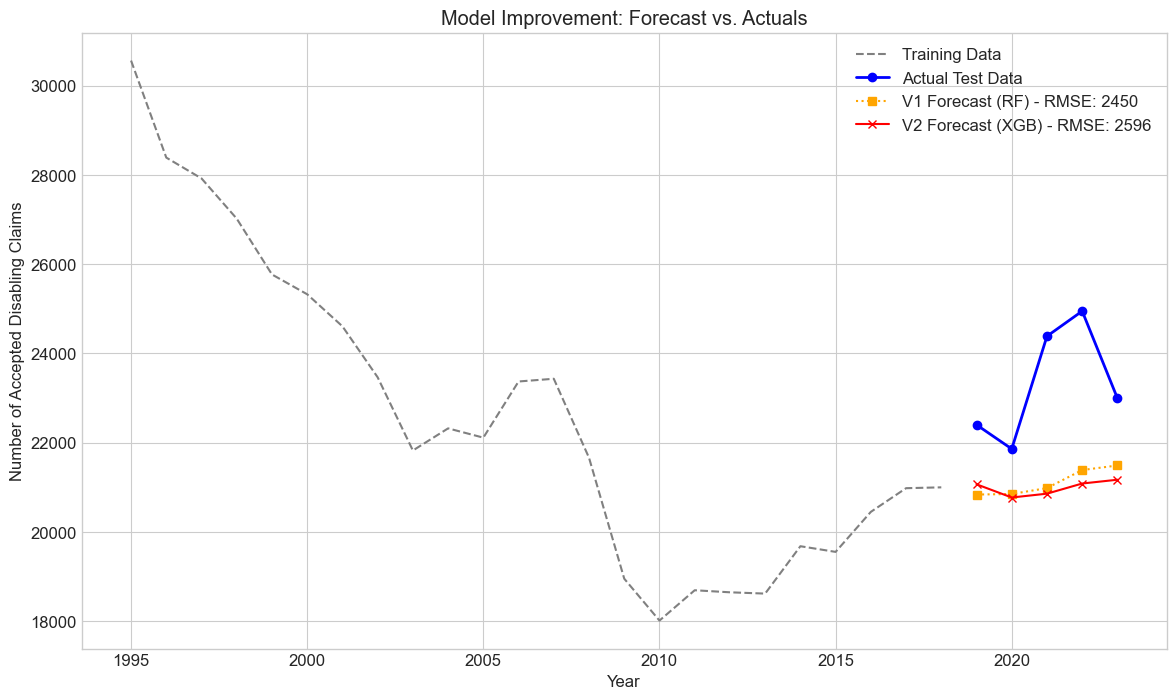

,Year,Actual_Claims,Predicted_Claims_v1_RF,Predicted_Claims_v2_XGB
51,2019,22399,20835.570833,21065.312500
52,2020,21858,20847.497500,20769.148438
53,2021,24385,20980.420000,20855.160156
54,2022,24948,21384.751667,21082.849609
55,2023,22994,21487.220000,21167.693359


In [21]:
# In a new cell

# --- Final Evaluation of the Improved Model ---
final_predictions_v2 = final_model_v2.predict(X_test_adv_scaled)
final_rmse_v2 = np.sqrt(mean_squared_error(y_test_adv, final_predictions_v2))

print(f"Original Model (Random Forest) Test RMSE: {final_rmse:.2f} claims")
print(f"IMPROVED Model (XGBoost) Test RMSE: {final_rmse_v2:.2f} claims")

improvement = final_rmse - final_rmse_v2
improvement_percent = (improvement / final_rmse) * 100
print(f"Improvement: {improvement:.2f} claims ({improvement_percent:.2f}%)")


# --- Visualize the New vs. Old Forecast ---
results_df_v2 = pd.DataFrame({
    'Year': test_df['Year'],
    'Actual_Claims': y_test_adv,
    'Predicted_Claims_v1_RF': final_predictions, # Original model's predictions
    'Predicted_Claims_v2_XGB': final_predictions_v2 # New model's predictions
})

plt.figure(figsize=(14, 8))
# Use the advanced dataset years to match y_train_adv length
plt.plot(adv_model_df[adv_model_df['Year'] <= split_year]['Year'], y_train_adv, label='Training Data', color='gray', linestyle='--')
plt.plot(results_df_v2['Year'], results_df_v2['Actual_Claims'], label='Actual Test Data', color='blue', marker='o', linewidth=2)
plt.plot(results_df_v2['Year'], results_df_v2['Predicted_Claims_v1_RF'], label=f'V1 Forecast (RF) - RMSE: {final_rmse:.0f}', color='orange', marker='s', linestyle=':')
plt.plot(results_df_v2['Year'], results_df_v2['Predicted_Claims_v2_XGB'], label=f'V2 Forecast (XGB) - RMSE: {final_rmse_v2:.0f}', color='red', marker='x', linestyle='-')

plt.title('Model Improvement: Forecast vs. Actuals')
plt.xlabel('Year')
plt.ylabel('Number of Accepted Disabling Claims')
plt.legend()
plt.grid(True)
plt.show()

display(results_df_v2)